# f-string을 이용해 출력형식 지정하기

In [33]:
age = 18
name = "홍길동"

print(age, name)
print("나는 name 이고, 나이는 age 이다.")
print("나는 %s 이고, 나이는 %d 이다."%(name, age))
print("pi값은 %.2f"%(3.141592))

# f-string으로 지정해 보기..

18 홍길동
나는 name 이고, 나이는 age 이다.
나는 홍길동 이고, 나이는 18 이다.


# 복습

- 최소제곱법(Least Square Method)
> 변수의 개수가 많아지면, 연산량이 기하급수적으로 증가
- 경사하강법(Gradient Descent Method) 
> 변수가 많아져도 연산량이 급격하게 증가하지 않음.

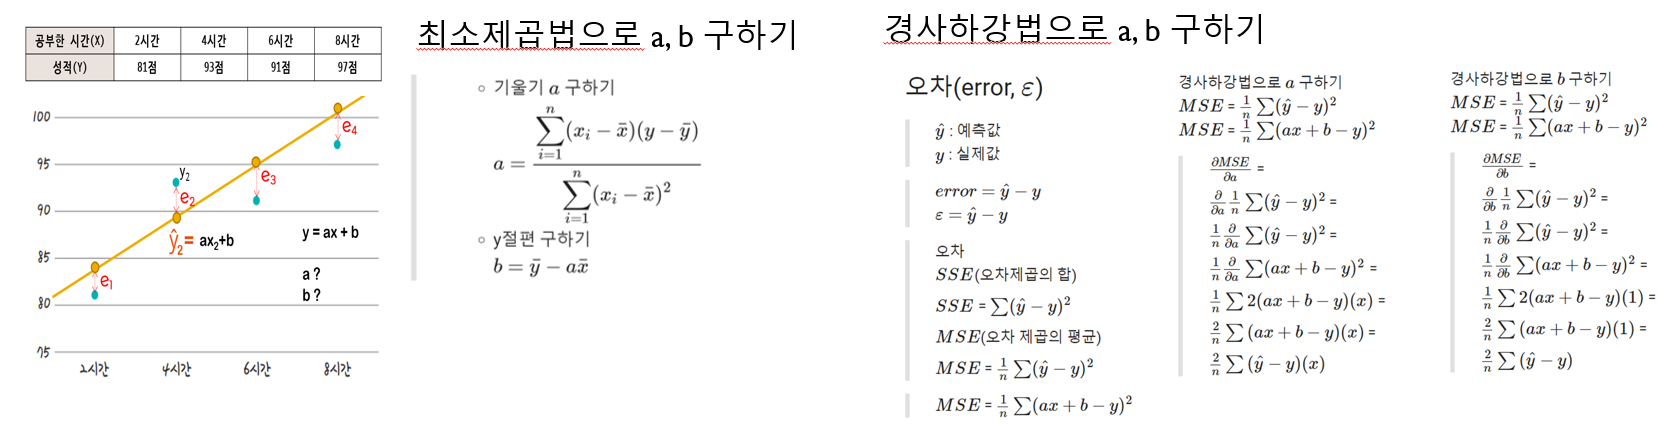

Text(0, 0.5, 'score')

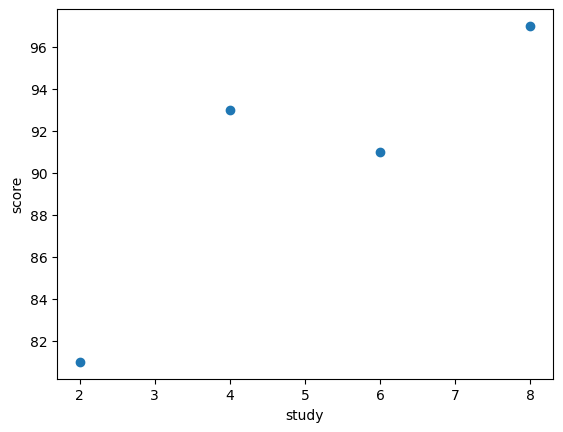

In [4]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([2, 4, 6, 8])
Y = np.array([81, 93, 91, 97])

plt.scatter(X, Y)

plt.xlabel("study")
plt.ylabel("score")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

###########################################
def left_graph(X, Y, a_list, MSE_list, update_a, a_grad) : # 왼쪽 차트

    # A = np.linspace(-2, 6.5)
    A = np.linspace(min(min(a_list)-1, -2), max(max(a_list), 2.3 + abs(2.3 - min(min(a_list)-1, -2)), 6.5))

    mse_list = []
    for a_ in A:
        Y_pred = a_ * X + b
        error = Y_pred - Y
        mse = np.mean(error ** 2)
        mse_list.append(mse)

    plt.plot(A, mse_list)
    plt.scatter(a_list[:-1], MSE_list[:-1]) # 처음부터 마지막-1 번째 점
    plt.scatter(a_list[-1], MSE_list[-1], c='r') # 마지막 점

    # 접선 그리기 (feat by dajung)
    xx = np.array([a_list[-1]-max(0.09*(abs(a_list[-1])), 1.5), a_list[-1] + max(0.09*(abs(a_list[-1])), 1.5)])
    yy = a_grad * (xx - a_list[-1]) + MSE_list[-1] # 기울기가 a_grad이고, (a, MSE)를 지나는 직선의 방정식
    plt.plot(xx, yy)


    # 발산할 경우 경고 문구
    if len(MSE_list)>=2 and (MSE_list[-2] < MSE_list[-1]) : msg = "danger"
    else                                                  : msg = ""

    # 이전 점과 현재 점 화살표로
    plt.annotate(msg, ha='center', va='bottom', xytext=(a_list[-1], MSE_list[-1]), xy=(a_list[-1], MSE_list[-1]), arrowprops={'edgecolor': 'b', 'alpha': 0.5, 'arrowstyle': '->'}) # 화살표???
    plt.plot(a_list[-2:], MSE_list[-2:])

    # 현재 Epoch
    if len(a_list)>=2 : epoch_msg = f"Epoch : {len(a_list)-1}"
    else              : epoch_msg = "User's Initial value a"

    plt.xlabel(f"a ({epoch_msg})")
    plt.ylabel("MSE(cost)")
    plt.title(f"a * x + b = {a_list[-1]:,.2f} * x + {b:,.2f}\na : {a_list[-1]:,.2f},    a_grad : {a_grad:,.2f},    MSE : {MSE_list[-1]:,.2f}\n\nupdate_a(next a) :\n    a = a - lr * a_grad = {a_list[-1]:,.2f} - {lr:,.2f} * {a_grad:,.2f} = {update_a:,.2f}\n\n", fontsize=7, loc='left')

def right_graph(X, Y, Y_pred, a_list, MSE):  # 오른쪽 차트
    plt.scatter(X, Y)
    plt.scatter(X, Y_pred)
    plt.plot(X, Y_pred, c='r')
    plt.xlabel("study_time")
    plt.ylabel("score")

    Y_pred_round = np.round(Y_pred, 2)
    Y_round = np.round(Y, 2)
    err = np.round(Y_pred - Y, 2)
    err_squ = np.round((Y_pred - Y)**2, 2)
    plt.title(f"Y_prediction = {a_list[-1]:,.2f} * x + {b:,.2f} = {a_list[-1]:,.2f} * {X} + {b:,.2f}\nerror = Y_prediction - Y_real = {Y_pred_round} - {Y_round}\n         = {err}\nerror^2 = {err_squ}\nMSE = sum(error^2) / n = sum({err_squ}) / {n} = {MSE:,.2f}\n\n", fontsize=8, loc='left')
###########################################

X = np.array([2, 4, 6, 8])
Y = np.array([81, 93, 91, 97])

a = -2          # a : 초기 ax+b의 기울기 값(변경해 볼 것...)
b = 79          # 이건 변경하지 말 것...
lr = 0.02       # lr : learning rate(학습률, 혹은 stepsize라고 부르기도 함.)로 a, b를 얼만큼씩 업데이이트 시켜야 하는지 결정(너무 작으면 학습 속도가 느림, 너무 크면 발산할 수 있음... 따라서 적당한 값
epoch = 15      # 전체 데이터를 이용해 1번 학습한 것을 1 epoch함.
n = len(X)

a_list = []
a_grad_list = []
MSE_list = []

plt.figure(figsize=(11, 4.5 * (epoch+1))) # 그래프 종이의 크기(가로8, 세로30)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=1.2) # 그래프 간격

for i in range(1, epoch+2) :
    Y_pred = a * X + b

    error = Y_pred - Y
    MSE = np.mean(error**2)

    a_grad = (2/n) * np.sum(error * X)   # a_grad = 2 * np.mean(error * x)
    b_grad = (2/n) * np.sum(error)       # b_grad = 2 * np.mean(error)

    before_a = a
    a = a - lr * a_grad
    # b = b - lr * b_grad                # 이건 그냥 그대로 둘 것...


    # 시각화 데이터
    a_list.append(before_a)
    MSE_list.append(MSE)
    a_grad_list.append(a_grad)

    plt.subplot(epoch+1, 2, 2*i-1)
    left_graph(X, Y, a_list, MSE_list, a, a_grad)

    plt.subplot(epoch+1, 2, 2*i)
    right_graph(X, Y, Y_pred, a_list, MSE)


plt.show()

# 단순 선형회귀 : $y = ax + b$

In [ ]:
# 단순 선형회귀 : 독립변수 1개 (공부시간 -> 성적)
# 대략 a : 2.3   b : 79.0
# 따라서 Y_pred = 2.3 * x + 79.0

import numpy as np

X = np.array([2, 4, 6, 8])
Y = np.array([81, 93, 91, 97])

a = 0
b = 0
lr = 0.03
epoch = 2000
n = len(X)

for i in range(1, epoch+1) :
    Y_pred = a * X + b           # y = ax+b
    Err = Y_pred - Y

    a_grad = (2/n) * np.sum(Err * X)  
    b_grad = (2/n) * np.sum(Err)

    a = a - lr * a_grad
    b = b - lr * b_grad

    print(f"epoch{i} : a : {a:.4f}   b : {b:.4f},   a_grad : {a_grad:.4f}  b_grad : {b_grad:.4f}") # 문제 : 100 epoch 마다 1번씩 출력

    # 문제 : a_grad가 0.0000 이하이고, b_grad가 0.0000이하이면 학습을 멈추도록 해보자.

## 문제 - 시각화 하기
> 입력데이터의 산점도 그리기(X, Y)  
> 예측데이터의 산점도 그리기(X, Y_pred)  
> 예측데이터의 직선 그리기(X, Y_pred

In [ ]:
# 위 학습 결과 a는 2.3, b는 79.0이었다.
X = np.array([2, 4, 6, 8])
Y = np.array([81, 93, 91, 97])

a = 2.3
b = 79.0

Y_pred = ??????

??????                      # 입력데이터의 산점도 그리기(X, Y)
??????                      # 예측데이터의 산점도 그리기(X, Y_pred)
??????                      #

plt.show()

## 문제 - 실제 점수와 예측 점수를 비교해 보자.


In [ ]:
# 위 학습 결과 a는 2.3, b는 79.0이었다.

X = np.array([2, 4, 6, 8])
Y = np.array([81, 93, 91, 97])

Y_pred = ?????????????????????

print(X)
print(Y)
print(Y_pred)

## 문제 - 학습(훈련)된 모델을 이용해 성적을 예측해 보기
> 3시간 공부 했을 때의 예측되는 성적은?  
> 5시간 공부 했을 때의 예측되는 성적은?

In [ ]:
study3 = ?????????????????  # 3시간 공부했을 때의 성적

study5 = ?????????????????  # 5시간 공부했을 때의 성적

print(study3)
print(study5)

# 다중 선형 회귀 : $y = a_1x_1 + a_2x_2 + b$

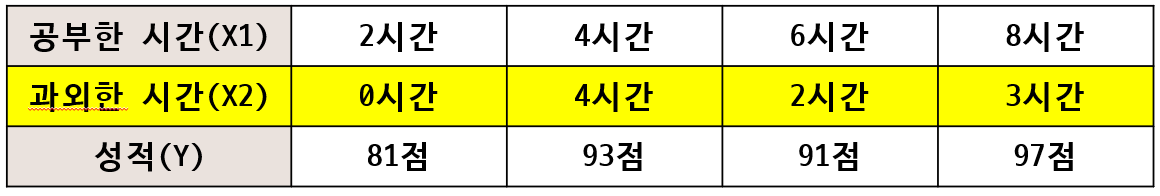

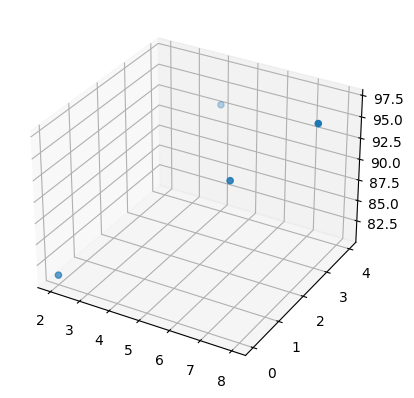

In [7]:
import numpy as np

X1 = np.array([2, 4, 6, 8])    # 
X2 = np.array([0, 4, 2, 3])

Y = np.array([81, 93, 91, 97])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X1, X2, Y)

plt.show()

In [ ]:
# 단순 선형회귀 : 독립변수 1개 (공부시간 -> 성적)

import numpy as np

X = np.array([2, 4, 6, 8])
Y = np.array([81, 93, 91, 97])

a = 0
b = 0
lr = 0.03
epoch = 200
n = len(X)

for i in range(1, epoch+1) :
    Y_pred = a * X + b           # y = ax+b
    Err = Y_pred - Y

    a_grad = (2/n) * np.sum(Err * X)  
    b_grad = (2/n) * np.sum(Err)

    print(f"epoch{i} : a : {a:.4f}   b : {b:.4f},   a_grad : {a_grad:.4f}  b_grad : {b_grad:.4f}") # 문제 : 100 epoch 마다 1번씩 출력

    a = a - lr * a_grad
    b = b - lr * b_grad

## 문제 : 위 코드를 참조해 다중 선형회귀 경사하강법 코드 작성하기

In [32]:
# 다중 선형회귀 : 독립변수 2개 (공부시간 -> 성적)
# 대략 a1 : 1.5192  a2 : 2.2923  b : 77.7255
#      Y_pred = 1.5192 * X1 + a2 * X2 + b

import numpy as np

X1 = np.array([2, 4, 6, 8])    # 공부시간
X2 = np.array([0, 4, 2, 3])    # 과외시간
Y = np.array([81, 93, 91, 97]) # 성적

a = 0
b = 0
lr = 0.03
epoch = 2000
n = len(X)

for i in range(1, epoch+1) :
    Y_pred = a * X + b        # y = a1*x1 + a2*x2 + b
    Err = Y_pred - Y

    a_grad = (2/n) * np.sum(Err * X)  
    b_grad = (2/n) * np.sum(Err)

    print(f"epoch{i} : a : {a:.4f}   b : {b:.4f},   a_grad : {a_grad:.4f}  b_grad : {b_grad:.4f}") # 문제 : 100 epoch 마다 1번씩 출력

    a = a - lr * a_grad
    b = b - lr * b_grad

epoch1 : a : 0.0000   b : 0.0000,   a_grad : -928.0000  b_grad : -181.0000
epoch2 : a : 27.8400   b : 5.4300,   a_grad : 796.7000  b_grad : 108.2600
epoch3 : a : 3.9390   b : 2.1822,   a_grad : -669.8380  b_grad : -137.2456
epoch4 : a : 24.0341   b : 6.2996,   a_grad : 577.0441  b_grad : 71.9405
epoch5 : a : 6.7228   b : 4.1414,   a_grad : -483.2174  b_grad : -105.4891
epoch6 : a : 21.2193   b : 7.3060,   a_grad : 418.2207  b_grad : 45.8055
epoch7 : a : 8.6727   b : 5.9319,   a_grad : -348.3182  b_grad : -82.4091
epoch8 : a : 19.1223   b : 8.4041,   a_grad : 303.3773  b_grad : 27.0309
epoch9 : a : 10.0209   b : 7.5932,   a_grad : -250.8111  b_grad : -65.6041
epoch10 : a : 17.5453   b : 9.5613,   a_grad : 220.3301  b_grad : 13.5755
epoch11 : a : 10.9354   b : 9.1541,   a_grad : -180.3367  b_grad : -53.3381
epoch12 : a : 16.3455   b : 10.7542,   a_grad : 160.2708  b_grad : 3.9632
epoch13 : a : 11.5374   b : 10.6353,   a_grad : -129.4056  b_grad : -44.3558
epoch14 : a : 15.4195   b : 11.9

In [ ]:
# 다중 선형회귀 : 독립변수 2개 (공부시간 -> 성적)


import numpy as np

X1 = np.array([2, 4, 6, 8])    # 공부시간
X2 = np.array([0, 4, 2, 3])    # 과외시간
Y = np.array([81, 93, 91, 97]) # 성적

a1 = 0
a2 = 0
b = 0
lr = 0.01
epoch = 2000
n = len(X)

for i in range(1, epoch+1) :
    Y_pred = a1 * X1 + a2 * X2 + b        # y = a1*x1 + a2*x2 + b
    Err = Y_pred - Y

    a1_grad = (2/n) * np.sum(Err * X1)  
    a2_grad = (2/n) * np.sum(Err * X2)
    b_grad = (2/n) * np.sum(Err)

    a1 = a1 - lr * a1_grad
    a2 = a2 - lr * a2_grad
    b = b - lr * b_grad

    print("epoch %d : %.4f  %.4f  %.4f  %.4f  %.4f  %.4f"%(i, a1, a2, b, a1_grad, a2_grad, b))